## Bharathwin MA
## Image and Video Analytics

## Banana Leaf Disease Detection

### Objective
                To Identify the Banana Leaf is diseased or not
                
### Import Necessary Libraries

In [1]:
#pip install opencv
#pip install tensorflow

import os
import cv2 
import keras
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

print("Tensorflow version: ",tf.__version__)
print("Keras version: ",keras.__version__)

Tensorflow version:  2.6.0
Keras version:  2.6.0


### Data Preprocessing

In [2]:
def Img_preprocessing(n):
    
    #step-1: Convert rgb to grayscale
    gray_scale=cv2.cvtColor(n, cv2.COLOR_BGR2GRAY )
        
    #step-2: Resize the image-----------------
    img_size=250
    resized_img=cv2.resize(gray_scale,(img_size,img_size)) #resize your image so your all images will have same size
    
    #step-3:do histogram equalisation to increase contrast of an image-------------
    equ = cv2.equalizeHist(resized_img)
    
    
    #step-4:remove noise :using gaussian blur----------------(for smoothing the image)
    blur=cv2.GaussianBlur(equ,(5,5),0)
    #blur=cv2.medianBlur(equ,5)
    
    #step-5: Image segmentation for edge detection-------------
    grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=3) #, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=3) #, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)   #sobel derivative
    
    clean_data =edges
    return clean_data

dir1="D:\Banana Leaf Disease Detection\Leaf Dataset\Banana"
catg=['Diseased','Health']

img_cube=[]
image_size=800

for i in catg:                        #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path):        #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) 
        final_data=Img_preprocessing(img_arr)
        img_cube.append([final_data,label])
        

print("Length of the dataset: ",len(img_cube))
print("\nWhole image data in array format:\n",img_cube[5])

Length of the dataset:  120

Whole image data in array format:
 [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 6, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


(250, 250)


0

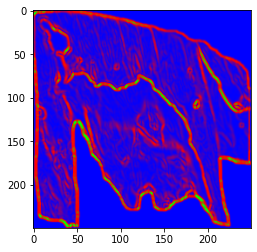

In [3]:
print(img_cube[20][0].shape)
plt.imshow(img_cube[20][0],cmap='brg')
img_cube[20][1]

(250, 250)


1

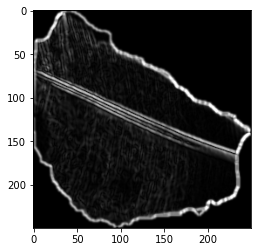

In [4]:
print(img_cube[119][0].shape)
plt.imshow(img_cube[119][0],cmap='gray')
img_cube[119][1]

In [5]:
#Here I am trying to shuffle the data 
random.shuffle(img_cube)

for i in img_cube[:5]:
    print(i[1])

#Below shown are the random labels generated 
#As i have 2 types of image folder in the dataset

1
1
0
1
0


### Classification Implementation

In [6]:
from sklearn.svm import SVC
#SVC,a subgroup in SVM, are supervised learning models with associated learning algorithms that analyze data for classification.

feature=[]
target=[]

for i in img_cube:
    flat=i[0].flatten()
    feature.append(flat)

for i in img_cube:
    target.append(i[1])

#Spliting into Training & Testing Datasets
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2)

#Fitting SVC for training datasets
clf1=SVC().fit(x_train,y_train)

#predicting classification model for test dataset
y_pred=clf1.predict(x_test)

In [7]:
print('Feature Length:',len(feature))
print('\nTarget Length',len(target))
print('\nAccuracy Score:', accuracy_score(y_test,y_pred)*100)
print('\nFeature:', feature[20])
print('\nTarget:', target[20])

Feature Length: 120

Target Length 120

Accuracy Score: 87.5

Feature: [0 0 0 ... 0 0 0]

Target: 1


### Evaluation Matrix

              precision    recall  f1-score   support

    Diseased       0.88      0.78      0.82         9
     Healthy       0.88      0.93      0.90        15

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.86        24
weighted avg       0.88      0.88      0.87        24



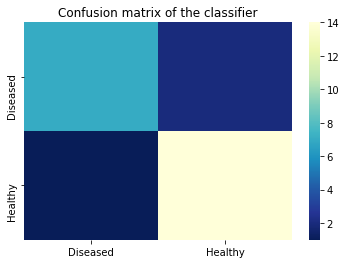

In [8]:
from sklearn.metrics import classification_report

labels={0:'Diseased',1:'Healthy'}
plt.title('Confusion matrix of the classifier')

#confusion matrix is a table often used for describing the performance of the classification models
cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cmap="YlGnBu_r", xticklabels=['Diseased','Healthy'], yticklabels=['Diseased','Healthy'])

k=classification_report(y_test,y_pred,target_names=['Diseased','Healthy'])
print(k)

### Data Augmentation

In [9]:
data_aug=ImageDataGenerator(rotation_range=40, 
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            channel_shift_range=0.2,
                            zoom_range=0.2,
                            fill_mode="nearest",
                            horizontal_flip=True,
                            vertical_flip=True)

In [10]:
### For Diseased Class
i=0
for batch in data_aug.flow_from_directory(directory="D:/Banana Leaf Disease Detection/Leaf Dataset/Banana/",
                                          classes=['Diseased'],
                                          batch_size=32,
                                          target_size=(500,500),
                                          color_mode='rgb',
                                          save_to_dir='D:/Banana Leaf Disease Detection/Leaf Dataset/Banana/Diseased',
                                          save_prefix='aug',
                                          save_format='png'):
    i += 1
    if i>10: #for this particular class it creates 10 images for each image in that class
        break

Found 60 images belonging to 1 classes.


In [11]:
#for Healthy class
i=0
for batch in data_aug.flow_from_directory(directory="D:/Banana Leaf Disease Detection/Leaf Dataset/Banana/",
                                          classes=['Health'],
                                          batch_size=32,
                                          target_size=(500,500),
                                          color_mode='rgb',
                                          save_to_dir='D:/Banana Leaf Disease Detection/Leaf Dataset/Banana/Health',
                                          save_prefix='aug',
                                          save_format='png'):
    i += 1
    if i>10: #for this particular class it creates 10 images for each image in that class
        break

Found 60 images belonging to 1 classes.


### Extracting Data

In [12]:
dir1="D:\Banana Leaf Disease Detection\Leaf Dataset\Banana"
catg=['Diseased','Health']

img_cube1=[]

for i in catg:                              #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path):                      #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j))           #convert rgb image to gray scale image
        #gray_img=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        final_data=cv2.resize(img_arr,(100,100))
        img_cube1.append([final_data,label])
        
img_cube1[5]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [ 60, 137,  97],
         [ 40, 118,  77],
         ...,
         [150, 190, 167],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [232, 237, 238],
         [ 87, 110, 119],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

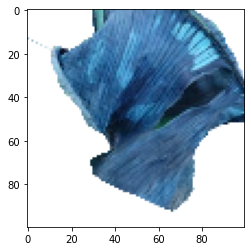

In [13]:
feat1=[]
tar1=[]
for i,j in img_cube1:
    feat1.append(i)
    tar1.append(j)
x = np.array(feat1)
x = x/255.0     #Normalizing --->>> as scaling the values between 0 to 1 bcoz lesser the values faster will be the calculation
y=np.array(tar1)
plt.imshow(x[230],cmap='gray')

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
print('x_train dtype:',x_train.dtype)
print('\ny_train dtype:',y_train.dtype)
x_train.shape, x_test.shape

x_train dtype: float64

y_train dtype: int32


((548, 100, 100, 3), (236, 100, 100, 3))

In [15]:
y_test.shape, y_train.shape

((236,), (548,))

### Data augmentation for a single image

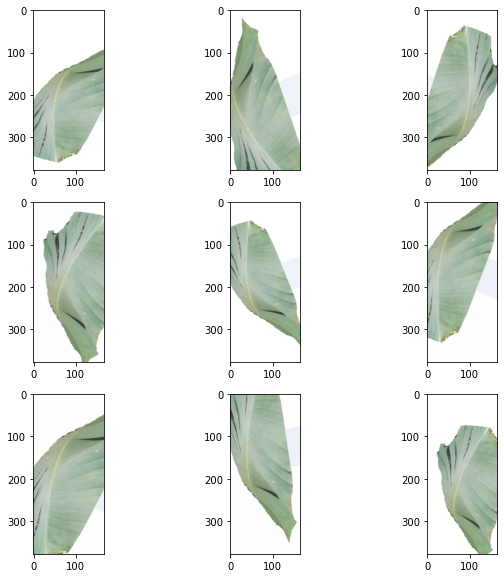

In [16]:
from numpy import expand_dims

# load the image
img = load_img("D:/Banana Leaf Disease Detection/Leaf Dataset/Banana/Health/2.png")

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# prepare iterator
itr = data_aug.flow(samples, batch_size=9)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = itr.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.show()

### Model Creation

In [17]:
cnn2=Sequential()

#convolutional layer-1
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-2
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-3
cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-4
cnn2.add(Conv2D(256, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#flatten layer
cnn2.add(Flatten(input_shape=x_train.shape[1:] ))
cnn2.add(Dense(256,activation='relu'))

#densly connected layer
cnn2.add(Dense(128,activation='relu'))

#output layer
cnn2.add(Dense(2,activation='softmax'))

cnn2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

#logit=true when we not use any normalization for last layer that means 
    #if we don't apply any act. fun then keep logit=true

history2=cnn2.fit(x_train, y_train, verbose=1, epochs=25,  #20
                  batch_size=32,  #15
                  validation_data=(x_test,y_test))

Epoch 1/25
18/18 [==============================] - 5s 227ms/step - loss: 0.6996 - accuracy: 0.5456 - val_loss: 0.6179 - val_accuracy: 0.6864
Epoch 2/25
18/18 [==============================] - 4s 201ms/step - loss: 0.5648 - accuracy: 0.7026 - val_loss: 0.5167 - val_accuracy: 0.7415
Epoch 3/25
18/18 [==============================] - 4s 200ms/step - loss: 0.4695 - accuracy: 0.7774 - val_loss: 0.4656 - val_accuracy: 0.8093
Epoch 4/25
18/18 [==============================] - 4s 204ms/step - loss: 0.3754 - accuracy: 0.8595 - val_loss: 0.4292 - val_accuracy: 0.8178
Epoch 5/25
18/18 [==============================] - 4s 203ms/step - loss: 0.3028 - accuracy: 0.8686 - val_loss: 0.4285 - val_accuracy: 0.8305
Epoch 6/25
18/18 [==============================] - 3s 191ms/step - loss: 0.3200 - accuracy: 0.8723 - val_loss: 0.1888 - val_accuracy: 0.9407
Epoch 7/25
18/18 [==============================] - 3s 195ms/step - loss: 0.2030 - accuracy: 0.9252 - val_loss: 0.5067 - val_accuracy: 0.8220
Epoch 

In [18]:
# Evaluating the Predictions on the Model
score = cnn2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 50ms/step - loss: 0.1341 - accuracy: 0.9576
Test loss: 0.13406212627887726
Test accuracy: 0.9576271176338196


In [19]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(cnn2.predict(x_test[i].reshape(1,100,100,3)))
        
len(y_test),len(y_pred)

(236, 236)

In [20]:
np.argmax(y_pred[1:10]) #to get max probability value we use argmax

0

In [21]:
result=[]
for i in range(len(x_test)):
    result.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
result[:10]

[array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

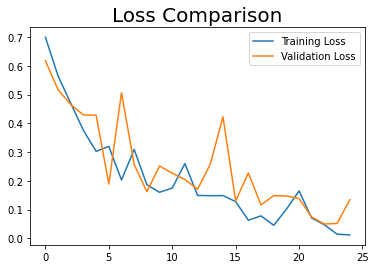

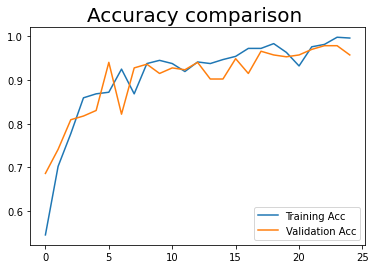

In [22]:
cnn2.summary()

y_pred2=result

print("Accuracy Found: ",accuracy_score(y_test,np.array(y_pred2)))

print("\nConfusion Matrix:\n",confusion_matrix(y_test,np.array(y_pred2)))

print("\nClassification Report:\n",classification_report(y_test,np.array(y_pred2)))

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [23]:
def prediction(result,cnn2):                   #type of result should be an array
    arr=cv2.resize(result,(100,100))
    y_prediction= cnn2.predict(arr.reshape(1,100,100,3))
    result=np.argmax(y_prediction,axis=1)            #take the index value of that array which value is maximum
    if result==0:
        print('Yes! This is a Diseased Leaf')
    elif result==1:
        print('Wohh! This is a Healthy Leaf')
        
prediction(x_test[6],cnn2)

Wohh! This is a Healthy Leaf


In [24]:
prediction(x_test[1],cnn2)

Yes! This is a Diseased Leaf


1


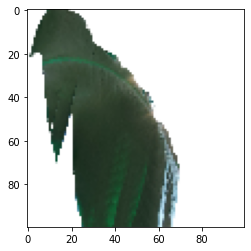

In [26]:
print(y_test[6])
plt.imshow(x_test[6])

0


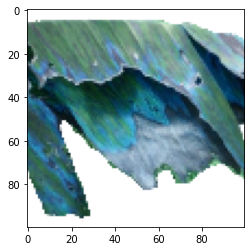

In [27]:
print(y_test[1])
plt.imshow(x_test[1])

## **!!!Thank You!!!**